In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math 
import MathsUtilities as MUte
import CAMP as camp
%matplotlib inline
pd.set_option('display.max_rows',1000)

In [2]:
CampVrnParams = pd.read_excel('..\CampVrnParams.xlsx',engine='openpyxl',index_col=0)  
CampVrnParams.sort_index(inplace=True)

In [7]:
def RunSingleScenario(D1,T1,P1,T2,P2,CultName,CultParams):
    Days = 300
    Day = range(Days)
    Tt1 = [T1] * D1; Pp1 = [P1] * D1
    Tt2 = [T2] * (Days - D1); Pp2 = [P2] * (Days - D1)
    Tt = Tt1 + Tt2; Pp = Pp1 + Pp2
    outputs = camp.CAMPmodel('FLN',Day,Tt,Pp,CultParams,camp.CampConstants,90)
    return outputs

# LaTrobe tests

In [4]:
LaTrobeCultivars = CampVrnParams.loc[CampVrnParams.Expt=='LaTrobe'].index.values

## Make a dataframe of model outputs for each treatment

In [11]:
LaTrobePred = pd.DataFrame(columns = ['Cultivar','Vernalisation','PhotoPeriod'])
LaTrobePred.set_index(['Cultivar','Vernalisation','PhotoPeriod'],inplace=True)

for C in LaTrobeCultivars:
    print(C)
    CultPars = CampVrnParams.loc[C,:]
    LaTrobePred.loc[(C,'C','L'),'PredFLN'] = RunSingleScenario(60,5.8,16,22,17,C,CultPars)
    LaTrobePred.loc[(C,'C','S'),'PredFLN'] = RunSingleScenario(60,5.8,8,22,8,C,CultPars)
    LaTrobePred.loc[(C,'W','L'),'PredFLN'] = RunSingleScenario(200,22,16,22,17,C,CultPars)
    LaTrobePred.loc[(C,'W','S'),'PredFLN'] = RunSingleScenario(200,22,8,22,8,C,CultPars)

Adv08_0008
Axe
Beaufort
Bennett
Bolac
Braewood
CSIROW002
CSIROW003
CSIROW005
CSIROW007
CSIROW011
CSIROW018
CSIROW021
CSIROW023
CSIROW027
CSIROW029
CSIROW073
CSIROW077
CSIROW087
CSIROW102
CSIROW105
Calingiri
Catalina
Condo
Crusader
Cutlass
Derrimut
Eaglehawk
Ellison
Emu_Rock
Forrest
Gauntlet
Gregory
Grenade
H45
Hume
Illabo
Janz
Kellalac
Kittyhawk
Lancer
Longsword
Mace
Magenta
Manning
Merinda
Mitch
Nighthawk
Ouyen
Peake
Revenue
Rosella
Scepter
Scout
Scythe
Spitfire
Strzelecki
Sunbee
Sunbri
Sunlamb
Sunstate
Suntop
Trojan
Wedgetail
Whistler
Wills
Wyalkatchem
Yitpi
Young


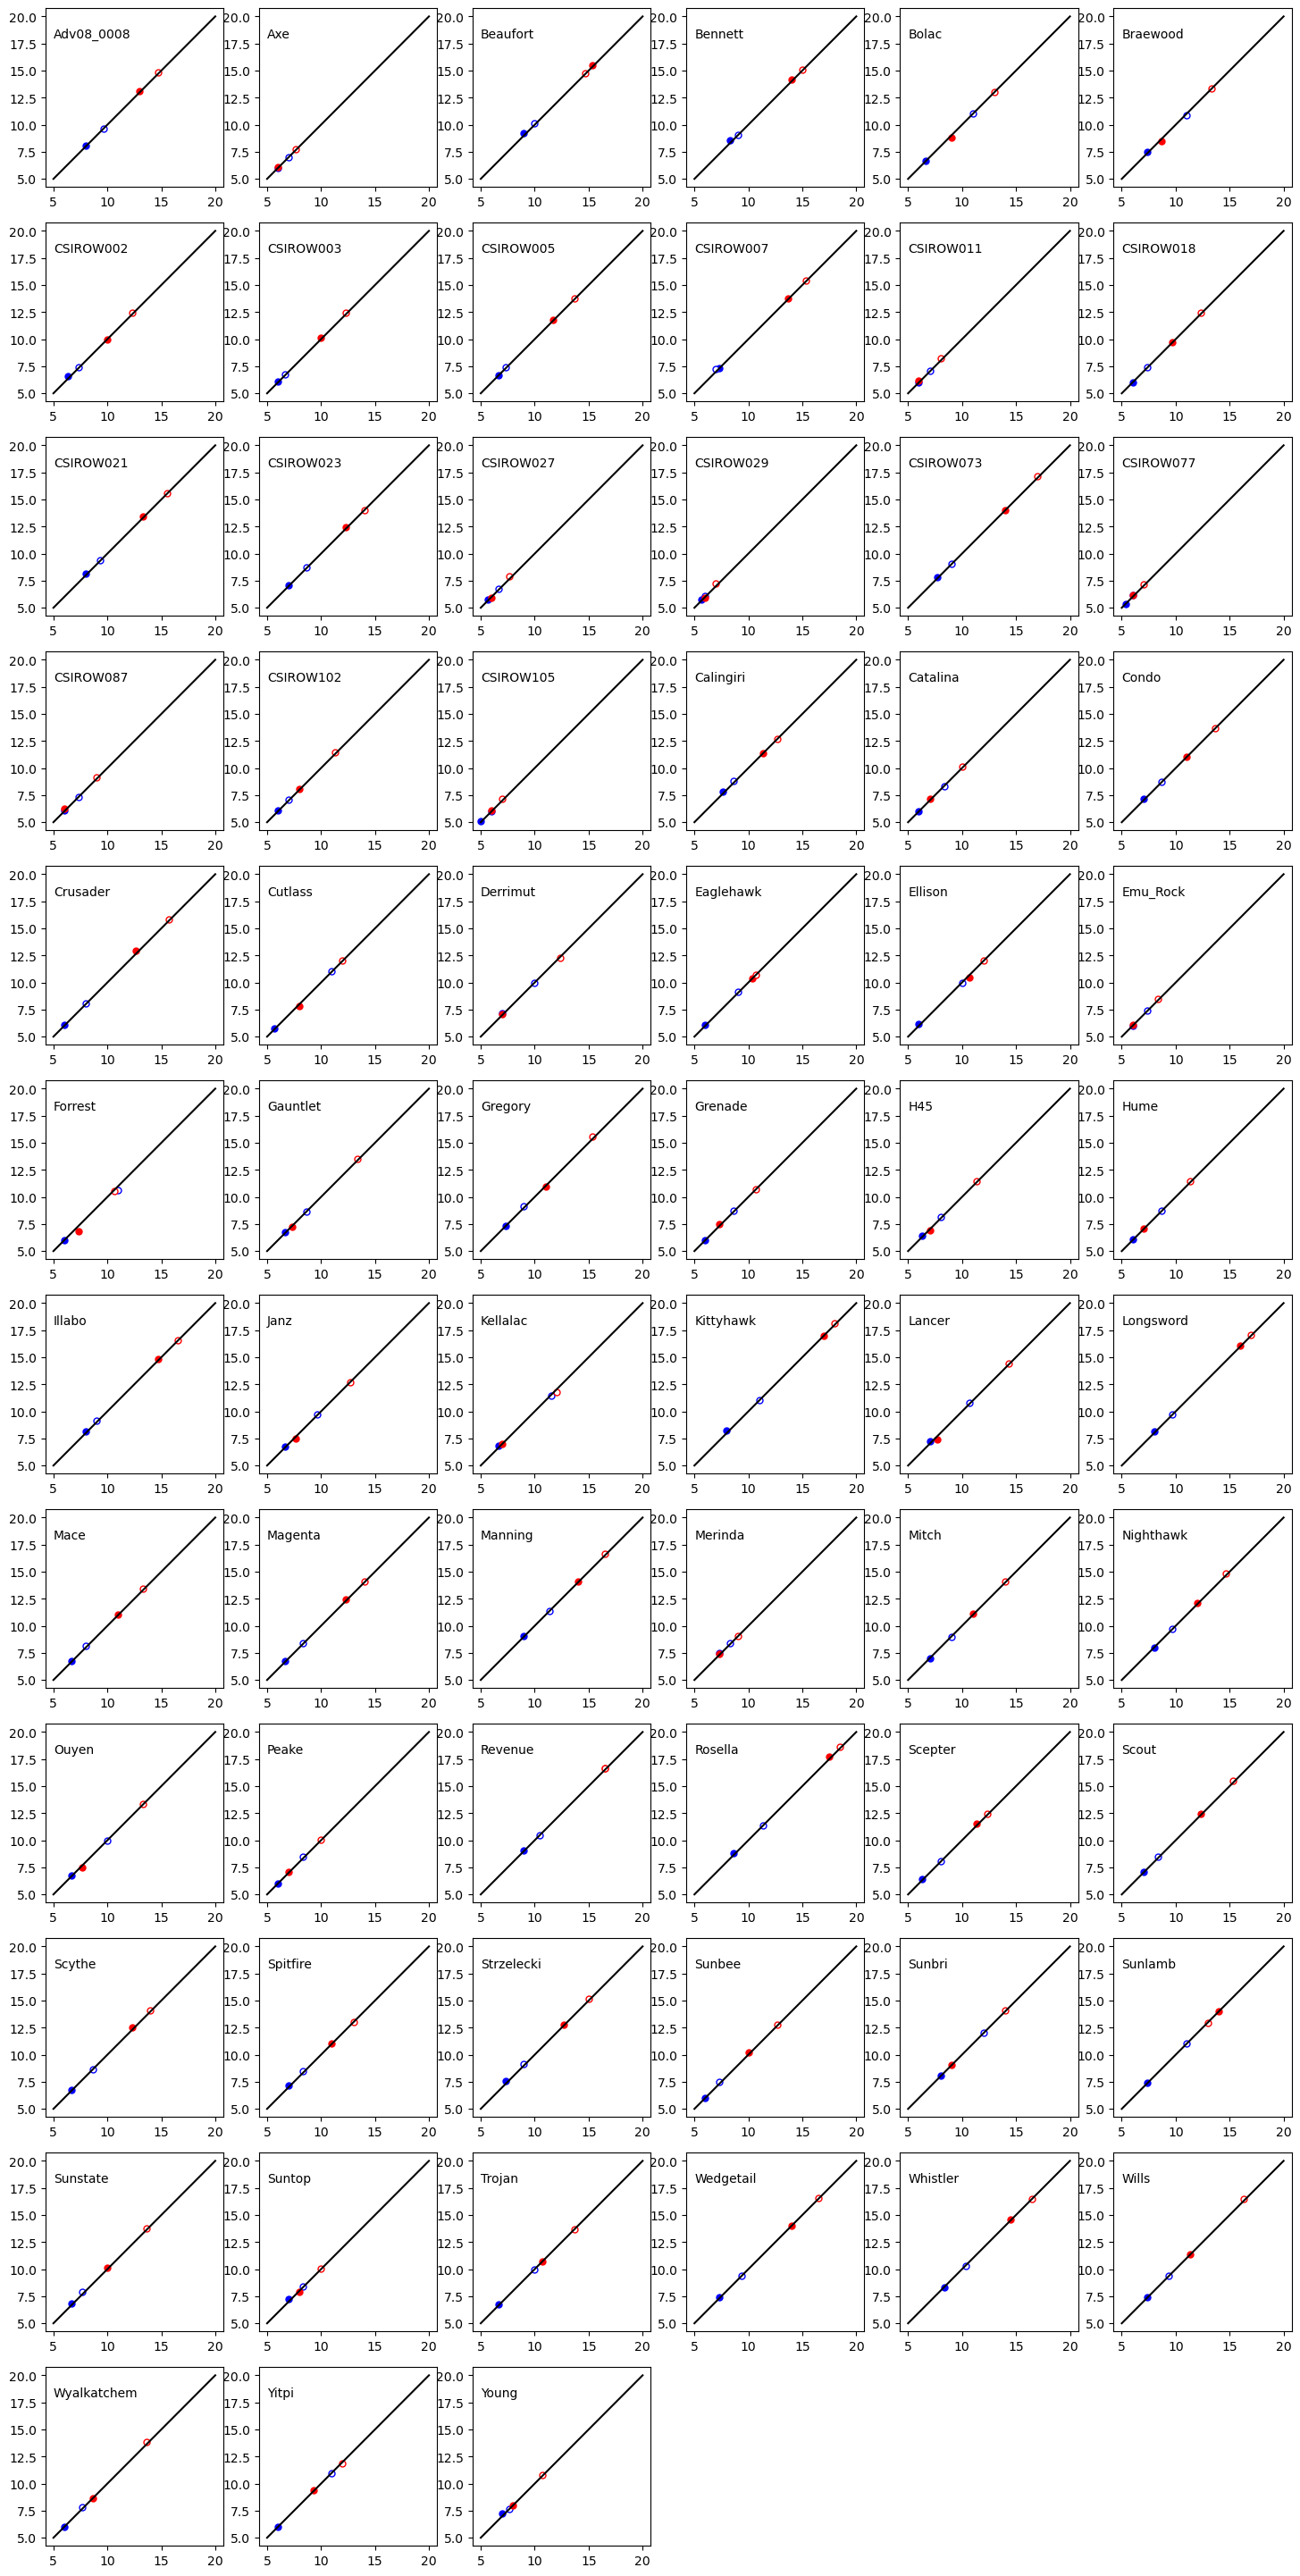

In [12]:
colors = ['r','b','r','b']
fills = ['r','b','w','w']
lines = ['--','--','-','-']
Graph = plt.figure(figsize=(18,40))
pos=1
for cul in LaTrobeCultivars:
    ax = Graph.add_subplot(13,6,pos)
    pos+=1
    plt.plot(CampVrnParams.loc[cul,'FLN_CL'], LaTrobePred.loc[(cul,'C','L'),'PredFLN'],'o',mec='b',mfc='b',ms=5)
    plt.plot(CampVrnParams.loc[cul,'FLN_CS'], LaTrobePred.loc[(cul,'C','S'),'PredFLN'],'o',mec='b',mfc='w',ms=5)
    plt.plot(CampVrnParams.loc[cul,'FLN_WL'], LaTrobePred.loc[(cul,'W','L'),'PredFLN'],'o',mec='r',mfc='r',ms=5)
    plt.plot(CampVrnParams.loc[cul,'FLN_WS'], LaTrobePred.loc[(cul,'W','S'),'PredFLN'],'o',mec='r',mfc='w',ms=5)
    plt.plot([5,20],[5,20],'-',color='k')
    plt.text(5,18,cul)

Graph.patch.set_facecolor('white')

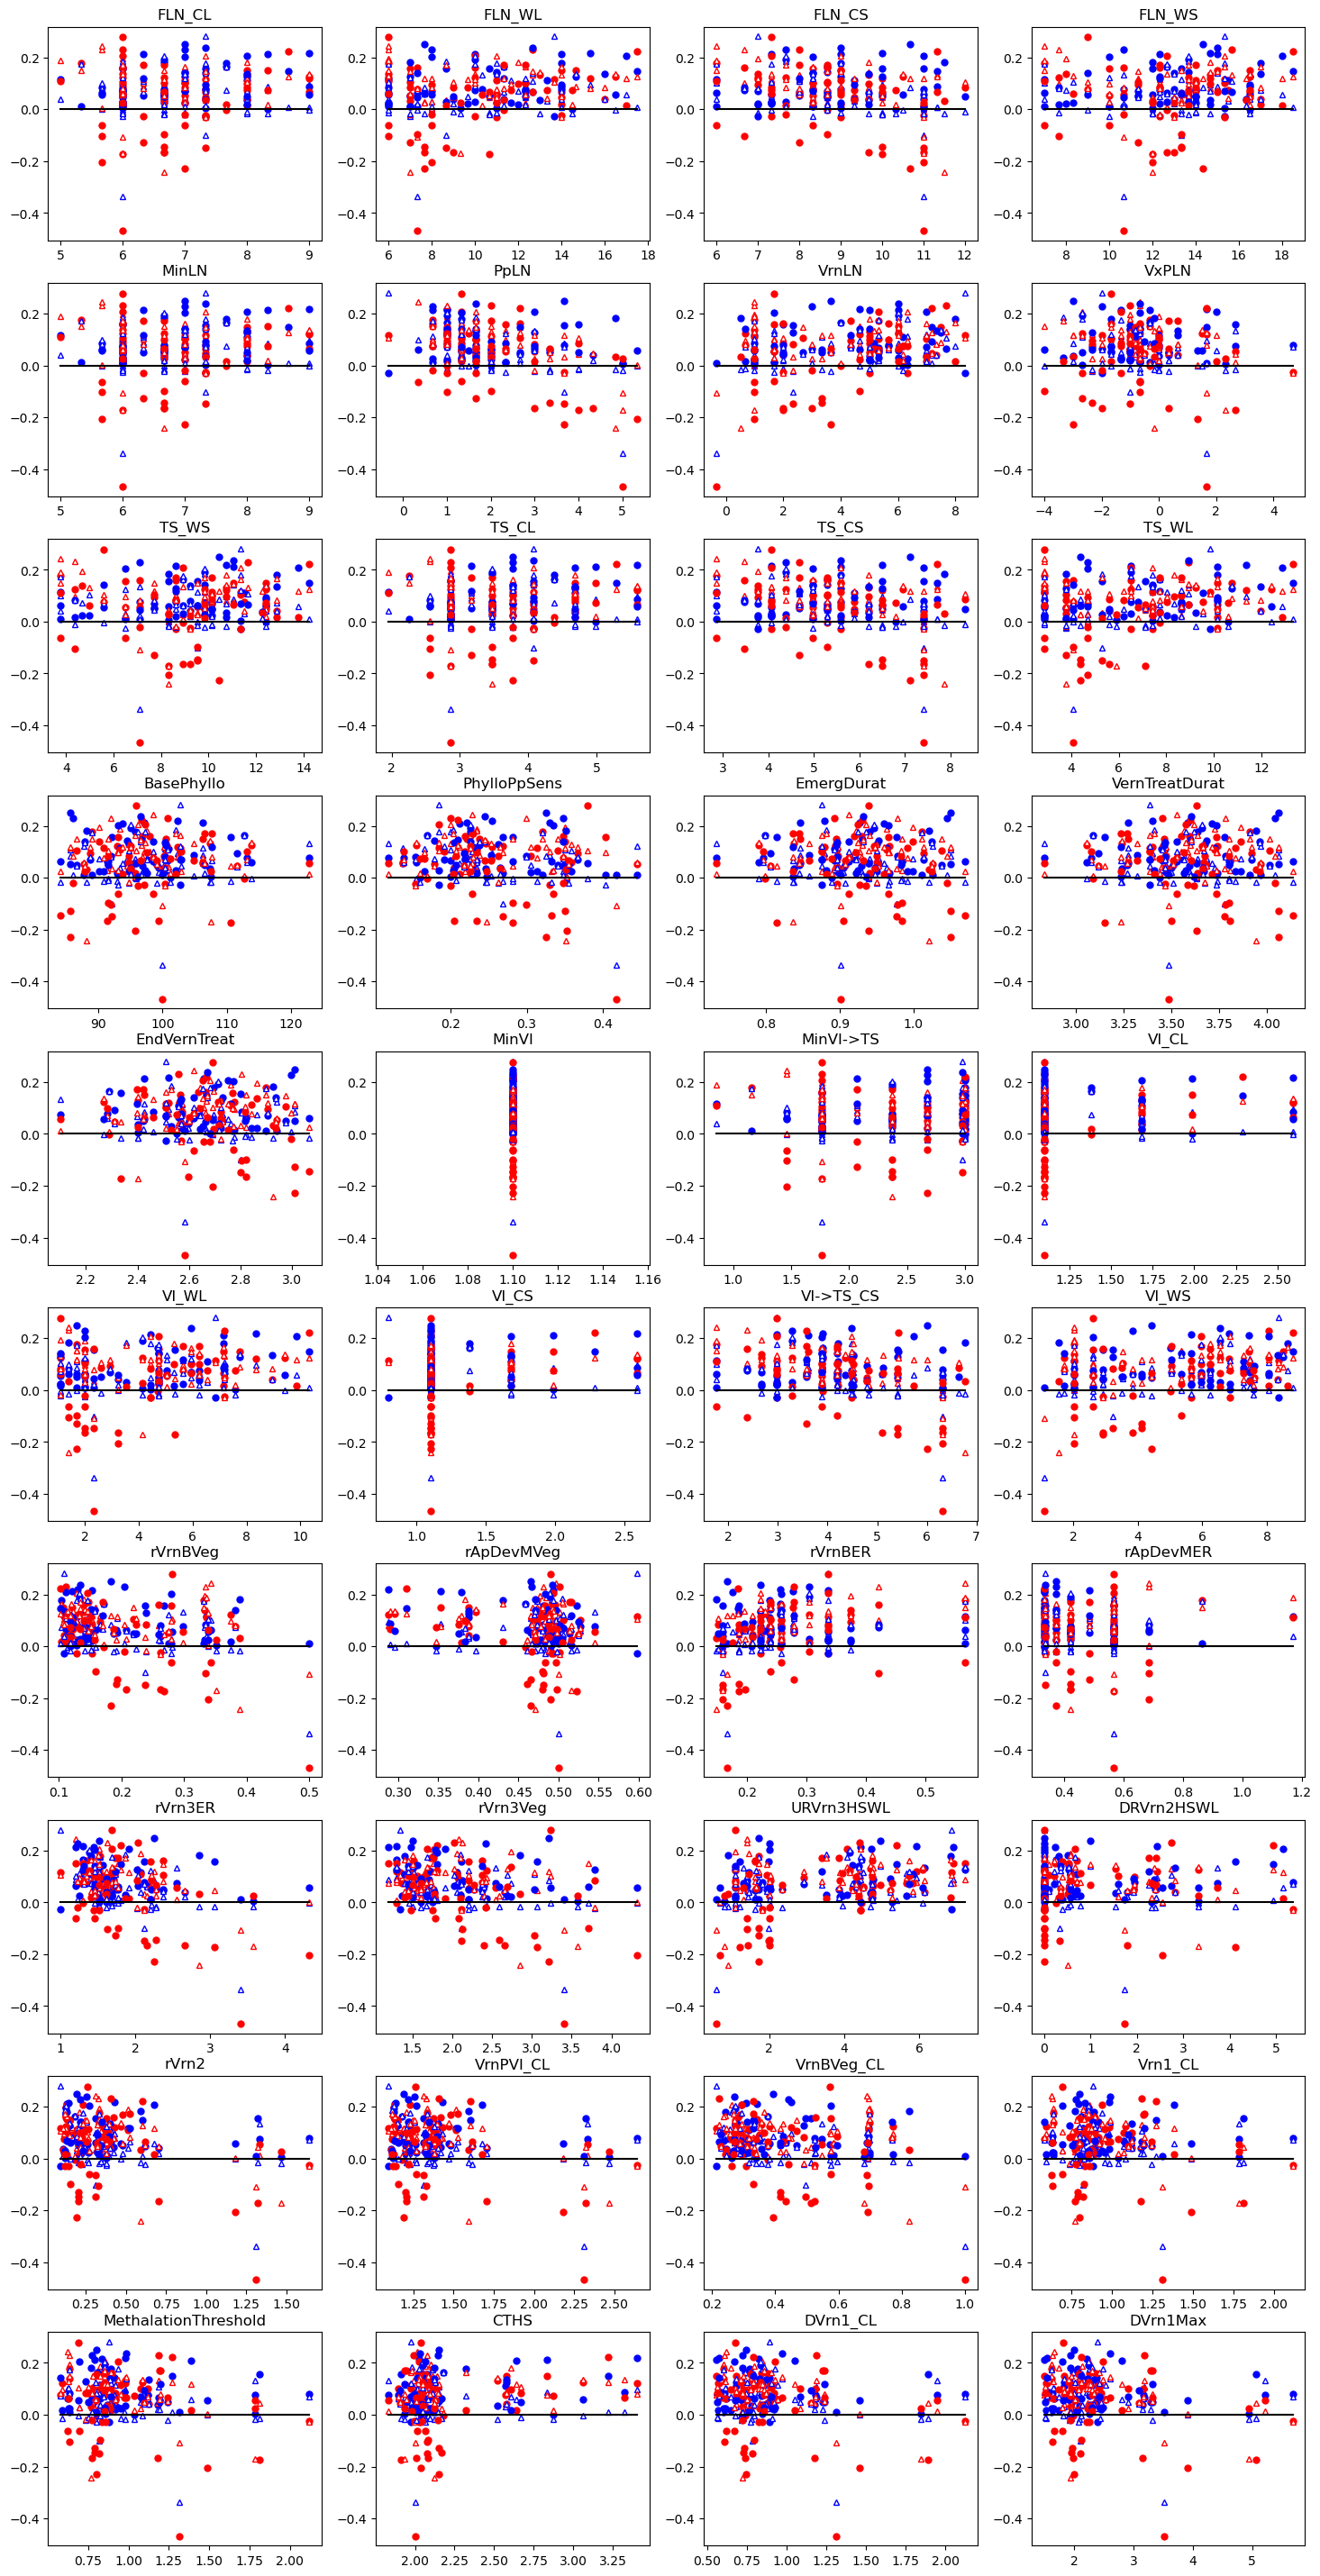

In [26]:
for t in LaTrobePred.index:
    LaTrobePred.loc[t,'ObsFLN'] = CampVrnParams.loc[t[0],'FLN_'+t[1]+t[2]]
LaTrobePred.loc[:,'Residual'] = LaTrobePred.loc[:,'PredFLN'] - LaTrobePred.loc[:,'ObsFLN']

Graph = plt.figure(figsize=(18,40))
pos=1
for p in CampVrnParams.columns[:-1]:
    if p != 'Expt':
        ax = Graph.add_subplot(11,4,pos)
        pos+=1
        xmin=100
        xmax=-100
        for c in CampVrnParams.loc[CampVrnParams.Expt=='LaTrobe'].index:
            xmin = min(xmin,CampVrnParams.loc[c,p])
            xmax = max(xmax,CampVrnParams.loc[c,p])
            plt.plot(CampVrnParams.loc[c,p], LaTrobePred.loc[(c,'C','L'),'Residual'],'o',mec='b',mfc='b',ms=5)
            plt.plot(CampVrnParams.loc[c,p], LaTrobePred.loc[(c,'W','L'),'Residual'],'o',mec='r',mfc='r',ms=5)
            plt.plot(CampVrnParams.loc[c,p], LaTrobePred.loc[(c,'C','S'),'Residual'],'^',mec='b',mfc='w',ms=5)
            plt.plot(CampVrnParams.loc[c,p], LaTrobePred.loc[(c,'W','S'),'Residual'],'^',mec='r',mfc='w',ms=5)
        plt.plot([xmin,xmax],[0,0],'-',color='k')
        plt.title(p)

Graph.patch.set_facecolor('white')

## Lincoln Tests

In [27]:
LincolnCultivars = CampVrnParams.loc[CampVrnParams.Expt=='Lincoln'].index.values

In [29]:
LincolnPred = pd.DataFrame(columns = ['Cultivar','Vernalisation','PhotoPeriod'])
LincolnPred.set_index(['Cultivar','Vernalisation','PhotoPeriod'],inplace=True)

for cul in LincolnCultivars:
    print(cul)
    CultPars = CampVrnParams.loc[cul,:]
    LincolnPred.loc[(cul,'C','L'),'PredFLN'] = RunSingleScenario(90,1,0,23,16,cul,CultPars)
    LincolnPred.loc[(cul,'C','S'),'PredFLN'] = RunSingleScenario(90,1,0,23,8,cul,CultPars)
    LincolnPred.loc[(cul,'W','L'),'PredFLN'] = RunSingleScenario(200,23,16,23,16,cul,CultPars)
    LincolnPred.loc[(cul,'W','S'),'PredFLN'] = RunSingleScenario(200,23,8,23,8,cul,CultPars)

374_q7_a4
Amarok
BattenSpring
BattenWinter
CRWT153
Otane
PNBattenWinter
Saracen
acbarrie
afghanistan_48
afghanistan_55
alberic
alsen
baxter
cenatur
chara
claire
cnt_1
consort
crwt146
crwt168
darius_gli_di
doyo_333
doyo_4
doyo_7
doyo_924
doyo_961
einstein
empress
etaya_26
etaya_28
etaya_31
etaya_32
etaya_33
etaya_34
ex_iraq_39
ex_iraq_40
ex_iraq_50
ex_morocco_27
excede
fortunato_p_s_681
france_ci_2241
genghis
goya
hilton
hrz07_0097_springtype
hrz07_0097_wintertype
intoto_24
intoto_3
intoto_4
intoto_5
intoto_8
janz
kenya_page
kohika
kokako
kww37
libellula
lontra
lyallpur_18
majestic
marcro
mccubbin
mezohegyeser_banati
morph
nada_2
nada_3
nepali
option
oroua
pastor
poland_5
pusa_101
pusa_54
raffles
regency
robigus
rongotea
sage
sind_30
torlesse
trigo_colonial
univ_reading_383
univ_reading_456
univ_reading_470
univ_reading_506
univ_reading_522
univ_reading_96
univ_reading_a1120
univ_reading_a1804
univ_reading_a1805
univ_reading_a1829
univ_reading_a310
vanquish
volcani
wakanui
weston
weston

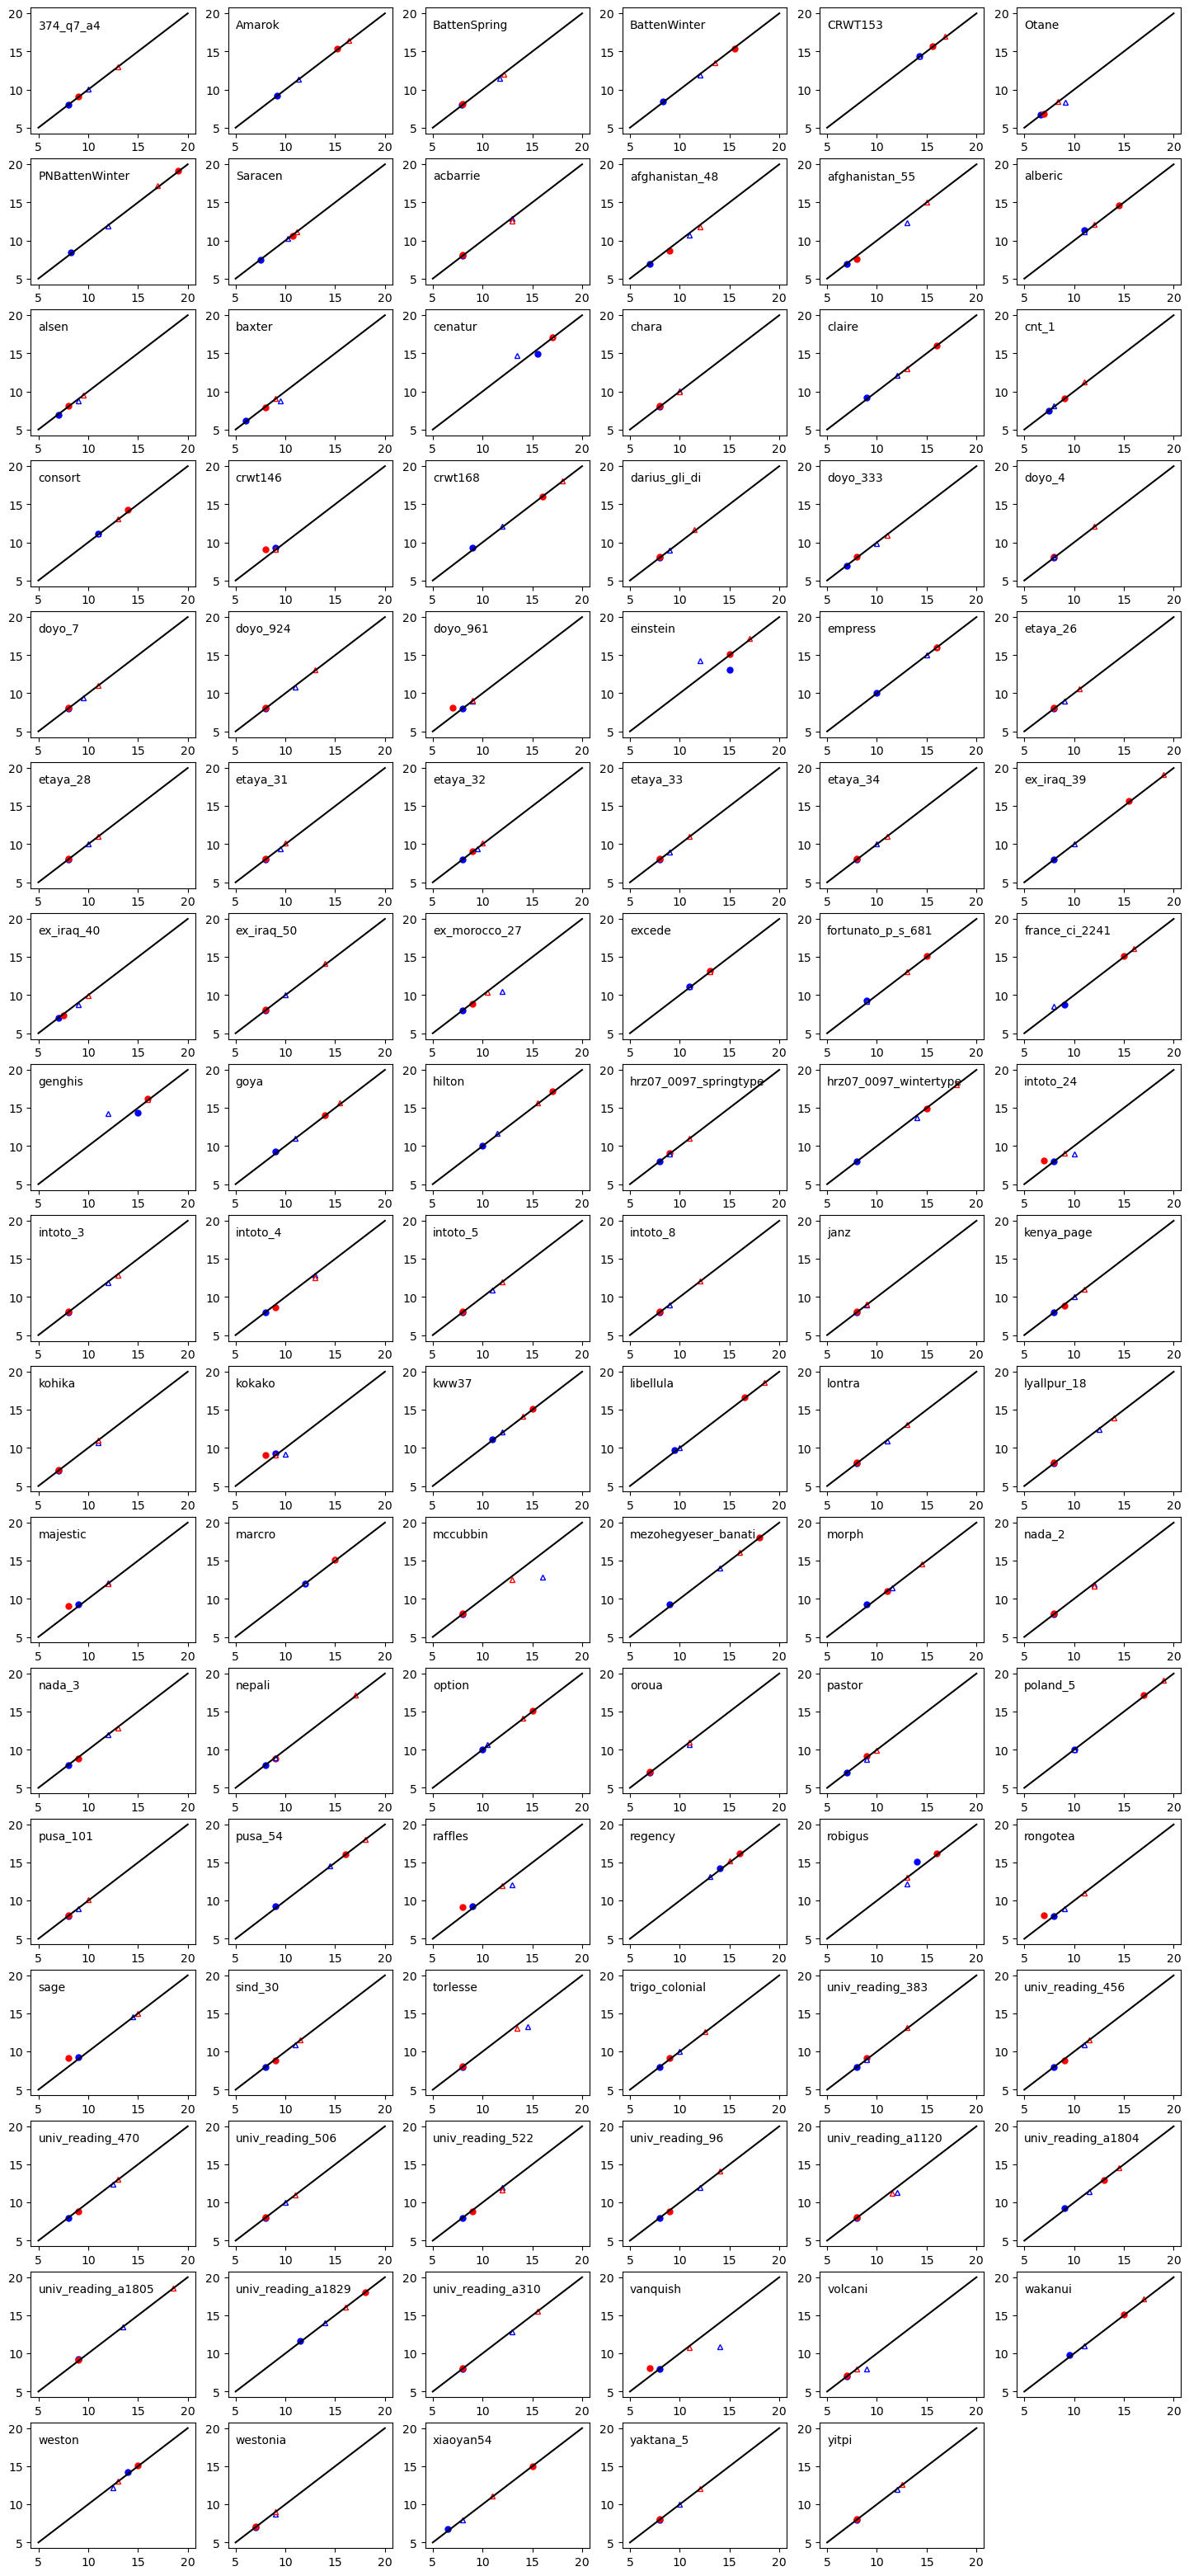

In [30]:
Graph = plt.figure(figsize=(18,40))
pos=1
for cul in LincolnCultivars:
    ax = Graph.add_subplot(17,6,pos)
    pos+=1
    plt.plot(CampVrnParams.loc[cul,'FLN_CL'], LincolnPred.loc[(cul,'C','L'),'PredFLN'],'o',mec='b',mfc='b',ms=5)
    plt.plot(CampVrnParams.loc[cul,'FLN_WL'], LincolnPred.loc[(cul,'W','L'),'PredFLN'],'o',mec='r',mfc='r',ms=5)
    plt.plot(CampVrnParams.loc[cul,'FLN_CS'], LincolnPred.loc[(cul,'C','S'),'PredFLN'],'^',mec='b',mfc='w',ms=5)
    plt.plot(CampVrnParams.loc[cul,'FLN_WS'], LincolnPred.loc[(cul,'W','S'),'PredFLN'],'^',mec='r',mfc='w',ms=5)
    plt.plot([5,20],[5,20],'-',color='k')
    plt.text(5,18,cul)

Graph.patch.set_facecolor('white')

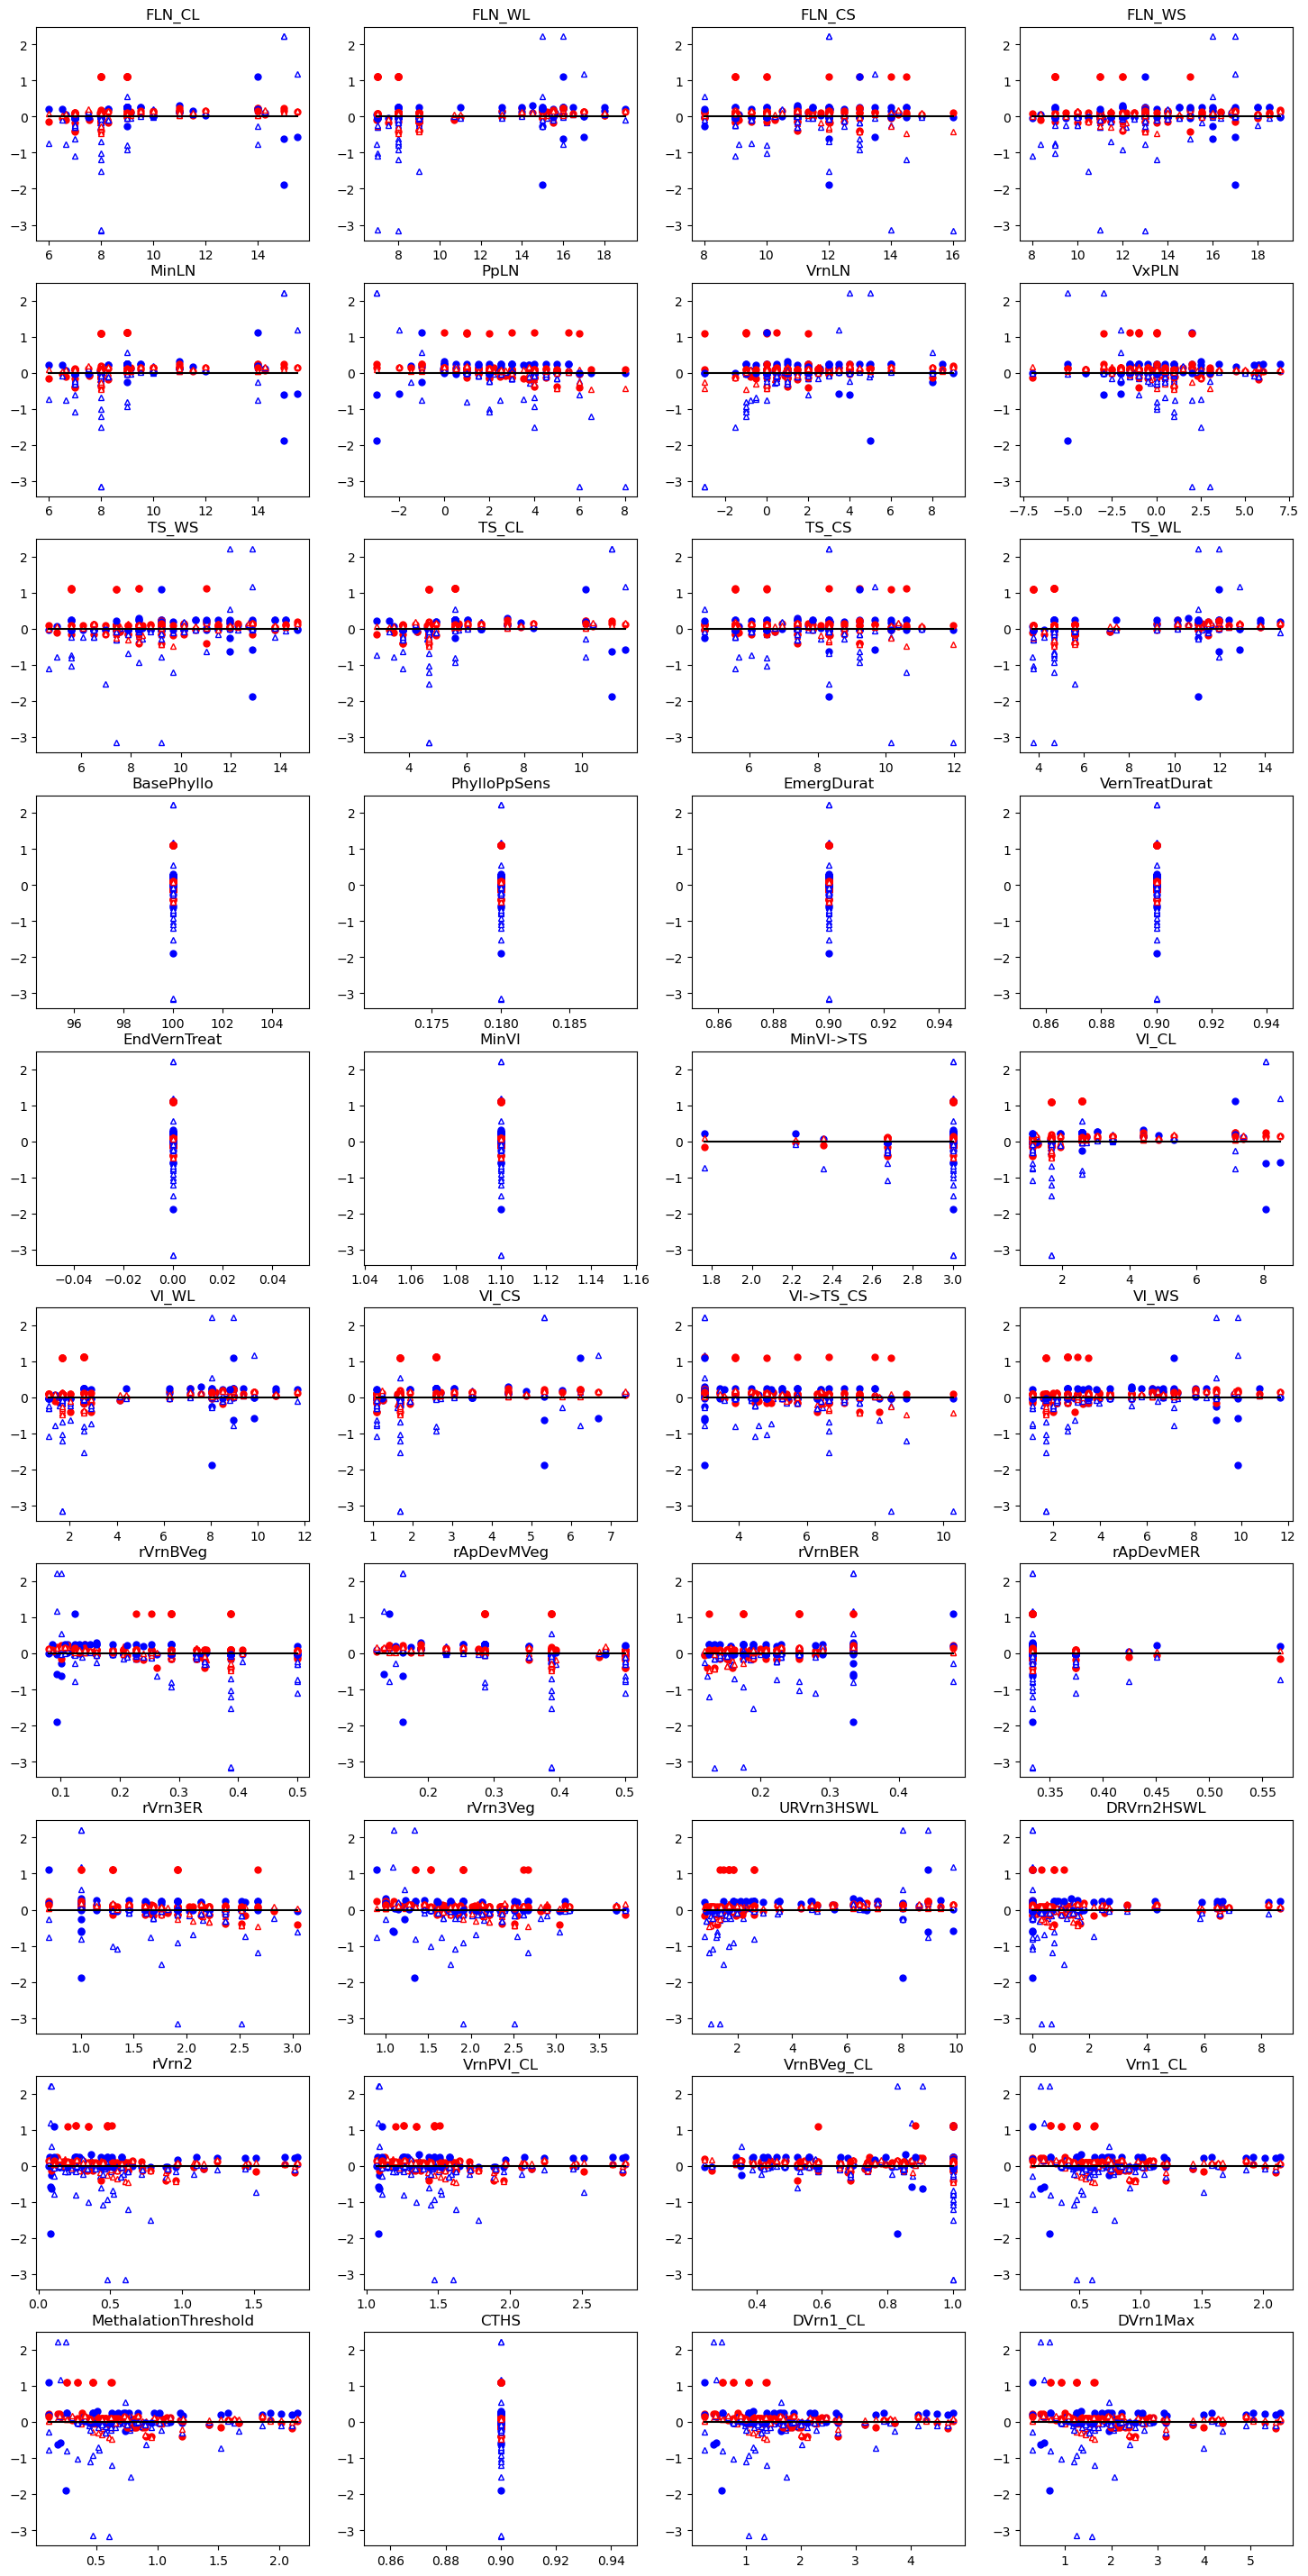

In [32]:
for t in LincolnPred.index:
    LincolnPred.loc[t,'ObsFLN'] = CampVrnParams.loc[t[0],'FLN_'+t[1]+t[2]]
LincolnPred.loc[:,'Residual'] = LincolnPred.loc[:,'PredFLN'] - LincolnPred.loc[:,'ObsFLN']

Graph = plt.figure(figsize=(18,40))
pos=1
for p in CampVrnParams.columns[:-1]:
    if p != 'Expt':
        ax = Graph.add_subplot(11,4,pos)
        pos+=1
        xmin=100
        xmax=-100
        for c in CampVrnParams.loc[CampVrnParams.Expt=='Lincoln'].index:
            xmin = min(xmin,CampVrnParams.loc[c,p])
            xmax = max(xmax,CampVrnParams.loc[c,p])
            plt.plot(CampVrnParams.loc[c,p], LincolnPred.loc[(c,'C','L'),'Residual'],'o',mec='b',mfc='b',ms=5)
            plt.plot(CampVrnParams.loc[c,p], LincolnPred.loc[(c,'W','L'),'Residual'],'o',mec='r',mfc='r',ms=5)
            plt.plot(CampVrnParams.loc[c,p], LincolnPred.loc[(c,'C','S'),'Residual'],'^',mec='b',mfc='w',ms=5)
            plt.plot(CampVrnParams.loc[c,p], LincolnPred.loc[(c,'W','S'),'Residual'],'^',mec='r',mfc='w',ms=5)
        plt.plot([xmin,xmax],[0,0],'-',color='k')
        plt.title(p)

Graph.patch.set_facecolor('white')